HOMEWORK 3주차 @@@@@@@@@

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [55]:
rng=np.random.RandomState(0)
years=rng.randint(1, 5, size=100)
gender=['female']*50 + ['male']*50
height=np.concatenate([rng.randn(50)*4+160, rng.randn(50)*7+170]) 
weight=np.concatenate([rng.randn(50)*4+60, rng.randn(50)*7+70]) 

문제1
heigth(x축)와 weight(y축) 사이의 산점도를 그리시오.

(단, marker는 'o' 사용)

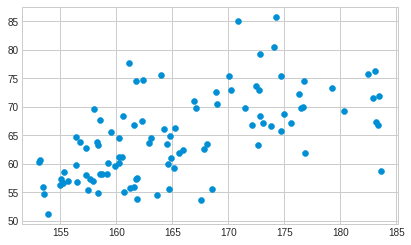

In [56]:
plt.scatter(height,weight,marker='o')

문제2
처음 50명이 'female', 나머지 50명이 'male' 데이터이므로 이를 서로 다른 종류로 구분하여 산점도를 그리시오.

단,

legend를 오른쪽아래 테두리 있는 형태로 추가
marker는 'o'(female), 's'(male) 사용
x축과 y축 label을 'height', 'weight'로 표시

Text(0, 0.5, 'weight')

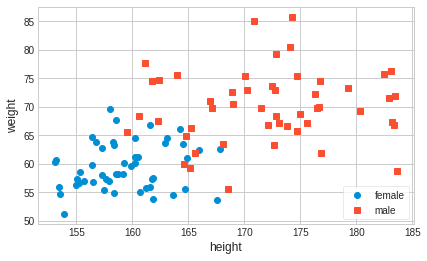

In [57]:
plt.plot(height[:50],weight[0:50],'o',label='female')
plt.plot(height[50:],weight[50:],'s',label = 'male')
plt.legend(loc='lower right',frameon=True)
plt.xlabel('height')
plt.ylabel('weight')

문제3
이번에는 years 변수 내용을 이용하여 학년별 산점도를 그리시오.

단,

legend를 왼쪽위 테두리 있는 형태로 추가하고 Year1, Year2, Year3, Year4로 label 부여
marker는 'o'(Year1), 's'(Year2), 'd'(Year3), '+'(Year4) 사용
x축과 y축 label을 'height', 'weight'로 표시

Text(0, 0.5, 'weight')

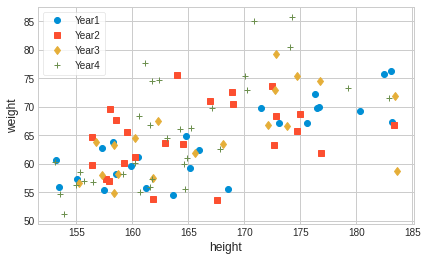

In [58]:
markers=['o','s','d','+']
for i in range(1,5):
  plt.plot(height[years==i],weight[years==i],markers[i-1],label='Year'+str(i))
plt.legend(loc='upper left',frameon=True)
plt.xlabel('height')
plt.ylabel('weight')

문제4
학년별 height의 평균(mean)과 표준편차(std)를 이용하여 errorbar를 그리시오.

단,

errorbar 속성은 수업시간에 배운 fmt='-k' 사용
x축과 y축 label을 'year', 'height'로 표시
x축 범위는 0부터 5까지로 설정

Text(0, 0.5, 'height')

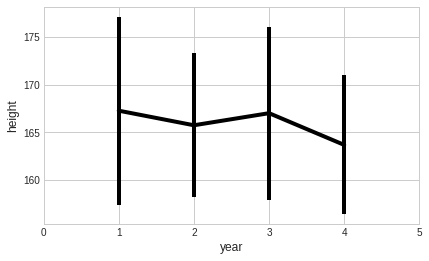

In [59]:
df=pd.DataFrame({'years':years,'gender':gender,'height':height,'weight':weight})
mean_hw = df.groupby('years').mean()
std_hw=df.groupby('years').std()
plt.errorbar(np.arange(1,5),mean_hw['height'],yerr=std_hw['height'],fmt='-k')
plt.xlim(left=0,right=5)
plt.xlabel('year')
plt.ylabel('height')

문제5
학년별 height와 weight의 histogram을 다음 조건에 맞게 그리시오.

4행 2열의 subplot을 생성하여 각 행은 year를 뜻하고, 1번 및 2번 열은 각각 height와 weight 결과를 뜻한다.
모든 histogram에서 bin의 개수는 10이다.
전체 그림의 크기는 [6.4, 6.4]이다.
subplot 사이의 공백은 hspace=0.4, wspace=0.4이다.

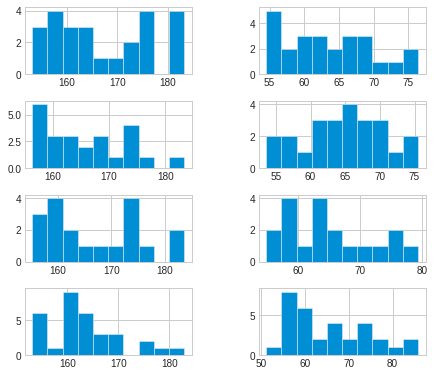

In [60]:
plt.figure(figsize=[6.4,6.4])
plt.subplots_adjust(hspace=0.4,wspace=0.4)
for i in range(1,5):
  plt.subplot(4,2,2*i-1)
  d=height[years==i]
  plt.hist(d,bins=10)

  plt.subplot(4,2,2*i)
  d=weight[years==i]
  plt.hist(d,bins=10)

HOMEWORK 4주차@@@@@@@@

In [61]:
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [62]:
nba = Table.read_table('https://raw.githubusercontent.com/data-8/materials-sp18/master/lec/nba_salaries.csv').relabeled("'15-'16 SALARY", 'SALARY').sort(0)
nba

PLAYER,POSITION,TEAM,SALARY
Aaron Brooks,PG,Chicago Bulls,2.25
Aaron Gordon,PF,Orlando Magic,4.17168
Aaron Harrison,SG,Charlotte Hornets,0.525093
Adreian Payne,PF,Minnesota Timberwolves,1.93884
Al Horford,C,Atlanta Hawks,12
Al Jefferson,C,Charlotte Hornets,13.5
Al-Farouq Aminu,SF,Portland Trail Blazers,8.04289
Alan Anderson,SG,Washington Wizards,4
Alec Burks,SG,Utah Jazz,9.46348
Alex Len,C,Phoenix Suns,3.80712


문제1
POSITION이 'PG'이면서 연봉이 가장 높은 TOP-5 선수 정보를 PG_TOP5 이름의 Table 변수에 저장하시오.

In [63]:
PG_TOP5=nba.where('POSITION','PG').sort('SALARY',descending=True).take(np.arange(5))
PG_TOP5

PLAYER,POSITION,TEAM,SALARY
Chris Paul,PG,Los Angeles Clippers,21.4687
Derrick Rose,PG,Chicago Bulls,20.0931
Russell Westbrook,PG,Oklahoma City Thunder,16.7442
Kyrie Irving,PG,Cleveland Cavaliers,16.4075
John Wall,PG,Washington Wizards,15.852


문제2
SALARY의 최대값과 최소값을 구하여 각각 max_salary, min_salary 변수에 저장하시오.

In [64]:
max_salary=nba.sort('SALARY',descending=True).column('SALARY')[0]
min_salary=nba.sort('SALARY',descending=True).column('SALARY')[-1]
max_salary,min_salary

(25.0, 0.030888)

문제3
각 TEAM별 선수 수를 감소순으로 정렬하여 team_ct 이름의 Table 변수에 저장하시오.

In [65]:
team_ct=nba.group('TEAM').sort('count',descending=True)
team_ct

TEAM,count
Memphis Grizzlies,21
Charlotte Hornets,18
Washington Wizards,17
Utah Jazz,17
Toronto Raptors,17
Phoenix Suns,17
Oklahoma City Thunder,16
New Orleans Pelicans,16
Boston Celtics,15
Portland Trail Blazers,14


문제4
연봉이 가장 높은 200명 중 POSITION별 평균 연봉을 Table변수top200에 저장하시오.

In [66]:
top200=nba.sort('SALARY',descending=True).take(np.arange(200)).select('POSITION','SALARY').group('POSITION',np.mean)
top200

POSITION,SALARY mean
C,9.07777
PF,8.1689
PG,9.12843
SF,10.2884
SG,8.10591


문제5
위와 같은 식으로 연봉이 가장 높은 100명 중 POSITION별 평균 연봉을 Table변수 top100에 저장하시오

In [67]:
top100=nba.sort('SALARY',descending=True).take(np.arange(100)).select('POSITION','SALARY').group('POSITION',np.mean)
top100

POSITION,SALARY mean
C,12.8281
PF,12.7646
PG,12.7541
SF,14.9192
SG,11.6078


문제6
위에서 구한 두 Table을 합쳐 Table 변수 top을 생성하시오. 이 때, column의 이름을 top100, top200으로 고치되 출력 순서도 top100, top200이 되도록 하시오.

In [68]:
top=top100.join('POSITION',top200,'POSITION').relabeled('SALARY mean','top100').relabeled('SALARY mean_2','top200')
top


POSITION,top100,top200
C,12.8281,9.07777
PF,12.7646,8.1689
PG,12.7541,9.12843
SF,14.9192,10.2884
SG,11.6078,8.10591


문제7
top100과 top200의 POSITION별 상대적 SALARY비중을 비교하기 위하여 top100과 top200 column 각각에 대하여 백분율(소수점 2번째자리에서 round-off)한 결과를 top에 추가하시오.

In [69]:
def percents(counts):
  total = counts.sum()
  return np.round((counts/total)*100,2)
top=top.with_columns(
    'top100 Percent',percents(top.column(1)),
    'top200 Percent',percents(top.column(2))
)
top

POSITION,top100,top200,top100 Percent,top200 Percent
C,12.8281,9.07777,19.77,20.28
PF,12.7646,8.1689,19.68,18.25
PG,12.7541,9.12843,19.66,20.39
SF,14.9192,10.2884,23,22.98
SG,11.6078,8.10591,17.89,18.11


문제8
top100 Percent와 top200 Percent에 대해서 수평 Bar 그래프를 그리시오.

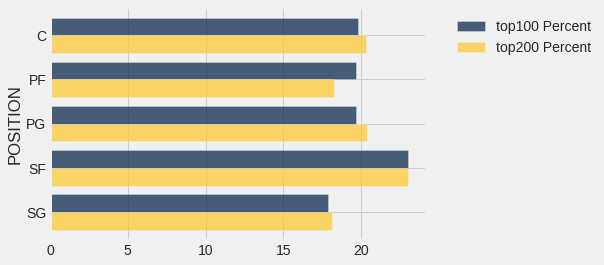

In [70]:
top.select(0,3,4).barh(0)

문제9
Table변수 nba의 SALARY column에 대해서 histogram을 그리시오. (단, bins의 개수를 50으로 설정하시오)

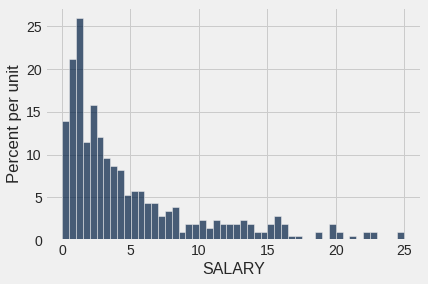

In [71]:
nba.hist('SALARY',bins=50)